# Exploratory data analysis and Machine Learning on "EURUSD" 5 Years Data

- Author: Max Kuan
- Date: 2021/10/10
- Envrionment: Jupter notebook with python 3.8.8

### Prepare Dataset
Reference: https://www.mql5.com/en/docs/integration/python_metatrader5

In [1]:
# !pip install MetaTrader5
import MetaTrader5 as mt5
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def history_data(symbol="EURUSD", period=mt5.TIMEFRAME_M5, ticks=70):
    """This method return the historical dataframe of a forex pair, the default symbol is EURUSD"""

    data = pd.DataFrame(mt5.copy_rates_from_pos(symbol, period, 0, ticks))

    data['time'] = pd.to_datetime(data['time'], unit='s')

    return data

## First, Initialize MT5 first and called the history data. 
**The data might be different based on different forex broker**

This notebook used [FXTM](http://www.forextime.com/register/open-account?raf=fa060479) as an example.

In [3]:
if mt5.initialize() == True:
    print("MT5 has been initialized")

MT5 has been initialized


Here we are going to use hourly data. Hence, we need to get 5 years of data, which is around 43800 tick.

In [4]:
historical_data = history_data(period=mt5.TIMEFRAME_H1, ticks=45000)

In [5]:
historical_data.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2014-07-09 00:00:00,1.36117,1.36142,1.36097,1.36115,748,14,1897610482
1,2014-07-09 01:00:00,1.36115,1.36128,1.36103,1.36120,1389,15,4005350923
2,2014-07-09 02:00:00,1.36121,1.36165,1.36106,1.36162,1154,15,3874850117
3,2014-07-09 03:00:00,1.36161,1.36223,1.36142,1.36152,3127,15,11719211900
4,2014-07-09 04:00:00,1.36152,1.36155,1.36120,1.36130,2388,15,9314140643


In [6]:
historical_data.isnull().sum()

time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [7]:
historical_data.describe()

,open,high,low,close,tick_volume,spread,real_volume
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04
mean,1.148342,1.149111,1.147595,1.148341,4440.359889,5.378356,3.490947e+09
std,0.058508,0.058456,0.058542,0.058498,3895.216380,5.337895,5.046077e+09
min,1.035550,1.037000,1.033990,1.035560,111.000000,0.000000,0.000000e+00
25%,1.108150,1.108710,1.107500,1.108150,1786.000000,1.000000,0.000000e+00
50%,1.134270,1.135020,1.133570,1.134270,3249.000000,3.000000,0.000000e+00
75%,1.182500,1.183272,1.181830,1.182500,5920.000000,7.000000,5.458136e+09
max,1.364720,1.365000,1.364420,1.364730,32888.000000,50.000000,8.144080e+10


**Price and volume is an important factor for considering while analysing a trading. However, weekday and hours also can be consider as an features for predict the price.**

In [8]:
#  Seperate hours and weekday from TimeFrame object
historical_data["time"] = pd.to_datetime(historical_data['time'])
historical_data['hours'] = historical_data['time'].dt.hour
historical_data['weekday'] = historical_data['time'].dt.weekday

[Simple Moving Average](https://www.investopedia.com/terms/s/sma.asp) can be also take into account, which is the simplest indicator for technical analysis. Hence, build a function to calculate the value of moving average.

In [9]:
def SMA(data, period):
    start = 0
    end = period
    while end < len(data):
        data.at[end, f'SMA{period}'] = np.mean(data['close'][start:end])
        start += 1
        end += 1
    return data

In [10]:
copy_history_data= historical_data.copy

In [11]:
historical_data = SMA(historical_data, 5)
historical_data = SMA(historical_data, 20)

In [12]:
historical_data.isnull().sum()

time            0
open            0
high            0
low             0
close           0
tick_volume     0
spread          0
real_volume     0
hours           0
weekday         0
SMA5            5
SMA20          20
dtype: int64

In [13]:
historical_data.dropna(how='any', axis=0, inplace=True)

In [14]:
historical_data.head()

,time,open,high,low,close,tick_volume,spread,real_volume,hours,weekday,SMA5,SMA20
20,2014-07-09 20:00:00,1.36260,1.36261,1.36195,1.36212,1798,16,3900070000,20,2,1.362278,1.361536
21,2014-07-09 21:00:00,1.36213,1.36477,1.36104,1.36452,6169,17,12578628000,21,2,1.362622,1.361584
22,2014-07-09 22:00:00,1.36452,1.36469,1.36393,1.36409,2278,15,4785224000,22,2,1.363196,1.361751
23,2014-07-09 23:00:00,1.36410,1.36412,1.36391,1.36408,1107,17,1803867000,23,2,1.363238,1.361874
24,2014-07-10 00:00:00,1.36400,1.36415,1.36389,1.36397,807,18,770420000,0,3,1.363478,1.362002


The distance between close price and different SMA value might be an important factor. Let's calculate the distance between them.

In [15]:
historical_data['dist_SMA5'] = historical_data['close'] - historical_data['SMA5']
historical_data['dist_SMA20'] = historical_data['close'] - historical_data['SMA20']

In [16]:
historical_data.head()

,time,open,high,low,close,tick_volume,spread,real_volume,hours,weekday,SMA5,SMA20,dist_SMA5,dist_SMA20
20,2014-07-09 20:00:00,1.36260,1.36261,1.36195,1.36212,1798,16,3900070000,20,2,1.362278,1.361536,-0.000158,0.000584
21,2014-07-09 21:00:00,1.36213,1.36477,1.36104,1.36452,6169,17,12578628000,21,2,1.362622,1.361584,0.001898,0.002935
22,2014-07-09 22:00:00,1.36452,1.36469,1.36393,1.36409,2278,15,4785224000,22,2,1.363196,1.361751,0.000894,0.002339
23,2014-07-09 23:00:00,1.36410,1.36412,1.36391,1.36408,1107,17,1803867000,23,2,1.363238,1.361874,0.000842,0.002206
24,2014-07-10 00:00:00,1.36400,1.36415,1.36389,1.36397,807,18,770420000,0,3,1.363478,1.362002,0.000492,0.001968


**Now lets apply some simply strategy. The Strategy is based on the price. However, it will not be show in this repo**
This function also generate some features for us to do some EDA, which is tick size, duration and label based on profit or not.

In [17]:
#  Import Necessary Libraries
from backtesting import *

In [18]:
df = BacktestStrategy(historical_data)

In [19]:
df.head()

,open,high,low,close,tick_volume,spread,real_volume,hours,weekday,SMA5,SMA20,dist_SMA5,dist_SMA20,profit,tick_size,duration,label
0,1.36260,1.36261,1.36195,1.36212,1798,16,3900070000,20,2,1.362278,1.361536,-0.000158,0.000584,-24.0,0.00066,960.0,0.0
1,1.36338,1.36368,1.36225,1.36236,4475,17,8640306000,12,3,1.363820,1.363765,-0.001460,-0.001405,-211.0,0.00143,540.0,0.0
2,1.36007,1.36036,1.35934,1.36025,2239,17,4855674000,21,3,1.359938,1.362528,0.000312,-0.002278,-33.0,0.00102,180.0,0.0
3,1.36073,1.36079,1.36050,1.36058,714,17,362145000,0,4,1.360286,1.361984,0.000294,-0.001404,-44.0,0.00029,300.0,0.0
4,1.35965,1.36031,1.35959,1.36014,1513,17,2637057000,5,4,1.360150,1.360877,-0.000010,-0.000737,19.0,0.00072,120.0,1.0


First, lets do a corrloration plot. The result shows that the lable were correlation with tick_volume, tick_size, duration, hours, dist_SMA20 and spread.

In [20]:
df.corr()

,open,high,low,close,tick_volume,spread,real_volume,hours,weekday,SMA5,SMA20,dist_SMA5,dist_SMA20,profit,tick_size,duration,label
open,1.000000,0.999768,0.999792,0.999582,0.003483,0.131338,-0.107163,-0.017997,0.014691,0.999851,0.998955,-0.024566,0.004956,-0.010826,-0.079518,0.003732,-0.001580
high,0.999768,1.000000,0.999679,0.999830,0.011410,0.133735,-0.101015,-0.015314,0.015625,0.999693,0.998927,-0.010425,0.011001,-0.011127,-0.065945,0.005504,-0.002847
low,0.999792,0.999679,1.000000,0.999822,-0.003721,0.128977,-0.112517,-0.020808,0.013779,0.999733,0.998981,-0.012121,0.009627,-0.009507,-0.091214,0.002114,0.000001
close,0.999582,0.999830,0.999822,1.000000,0.003746,0.131268,-0.106785,-0.018133,0.014696,0.999586,0.998957,-0.000828,0.014065,-0.010135,-0.078235,0.003831,-0.001271
tick_volume,0.003483,0.011410,-0.003721,0.003746,1.000000,0.314626,0.767326,0.249233,0.063417,0.003463,0.003501,0.009758,0.005328,-0.026428,0.594762,0.075626,-0.072247
spread,0.131338,0.133735,0.128977,0.131268,0.314626,1.000000,0.583113,-0.017529,0.004055,0.131722,0.132169,-0.017782,-0.020886,-0.031368,0.176808,0.029685,-0.018505
real_volume,-0.107163,-0.101015,-0.112517,-0.106785,0.767326,0.583113,1.000000,0.170528,0.027278,-0.107142,-0.106586,0.014043,-0.003428,-0.011008,0.460744,0.050509,-0.039457
hours,-0.017997,-0.015314,-0.020808,-0.018133,0.249233,-0.017529,0.170528,1.000000,0.036870,-0.018383,-0.017828,0.008965,-0.006520,-0.003943,0.217493,0.204032,-0.034569
weekday,0.014691,0.015625,0.013779,0.014696,0.063417,0.004055,0.027278,0.036870,1.000000,0.014586,0.015288,0.003606,-0.013091,0.002677,0.071444,0.280670,0.003170
SMA5,0.999851,0.999693,0.999733,0.999586,0.003463,0.131722,-0.107142,-0.018383,0.014586,1.000000,0.999258,-0.029599,-0.001579,-0.010625,-0.080145,0.003861,-0.001519


In [23]:
eda_df = df[['tick_volume', 'tick_size', 'hours', 'duration', 'profit', 'label']]

The figure illustrated that label might had different pattern in different hours and duration. There are much more datapoint which have been labeled as 0 at 15 o'clock. Besides, the mean value of the duration were different for different label.

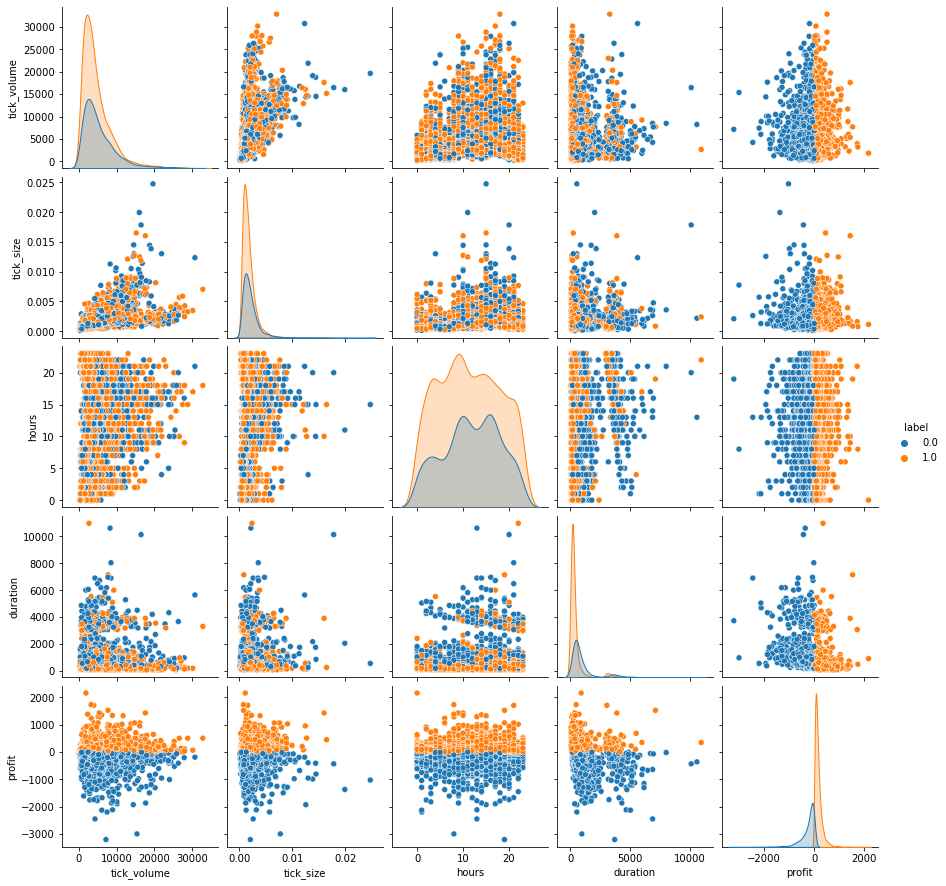

In [24]:
sns.pairplot(eda_df, hue='label')

The result show, there are probabily more chance to lost profit at 16 o'clock and profit at 11 o'clock

<AxesSubplot:>

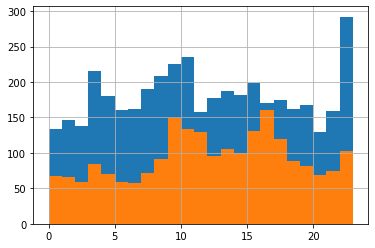

In [32]:
eda_df[eda_df['profit'] > 0].hours.hist(bins=23)
eda_df[eda_df['profit'] < 0].hours.hist(bins=23)

<AxesSubplot:>

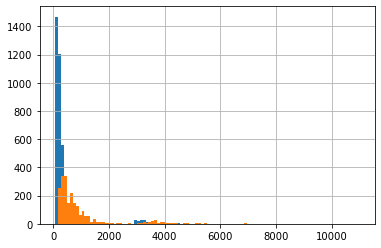

In [33]:
eda_df[eda_df['profit'] > 0].duration.hist(bins=100)
eda_df[eda_df['profit'] < 0].duration.hist(bins=100)